## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [282]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [283]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [284]:
X.shape

(50,)

In [285]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

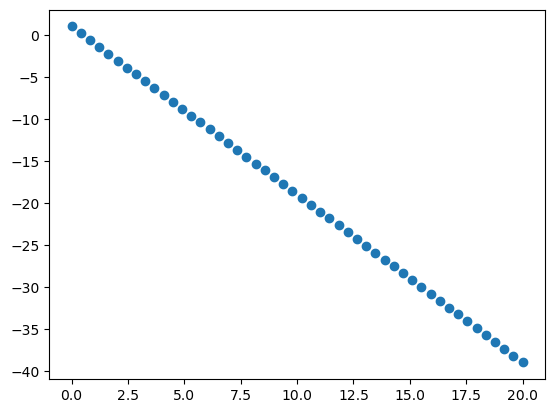

In [149]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [150]:
def gradient_descent_fun(X, y, n_iter=1000, lr=0.01,convergance_rate=0.001,norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []

    for i in range(n_iter):
        # We need to append theta First due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Step two: Predict using initial theta
        h = theta_0 + theta_1 * X

        # Step three: Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Step four: Calculate gradient for weights
        theta_0_grad=sum((h-y))/m
        theta_1_grad=sum((h-y)*X)/m

        # Gradient vector norm
        grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))

        # Convergence check
        if (grad_vector < norm_value_check) or ((i != 0) and (abs(losses[i - 1] - J) < convergance_rate)):
            break

        # Step Five: Update our weights
        theta_0 = theta_0 - lr * theta_0_grad
        theta_1 = theta_1 - lr * theta_1_grad
        
        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{theta_0_grad}]\n [{theta_1_grad}]]\n")
        print(f"Gradient Vector Norm: {grad_vector}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")
    
    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y

    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)

    # predictions
    final_predictions = theta_0 + theta_1 * X
        
    return theta_0,theta_1,losses, theta_0_all, theta_1_all,final_predictions

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [59]:
theta_0,theta_1,losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=300, lr=0.0005)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

J = 249.88775510204087

Gradient Vector:
[[19.0]
 [259.3877551020408]]

Gradient Vector Norm: 260.0826935743251

theta_0_new: -0.0095
theta_1_new: -0.129693877551

#### Calculate r2 score

In [60]:
from sklearn.metrics import r2_score
y_pred=final_predictions
r2_score(y,y_pred)

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

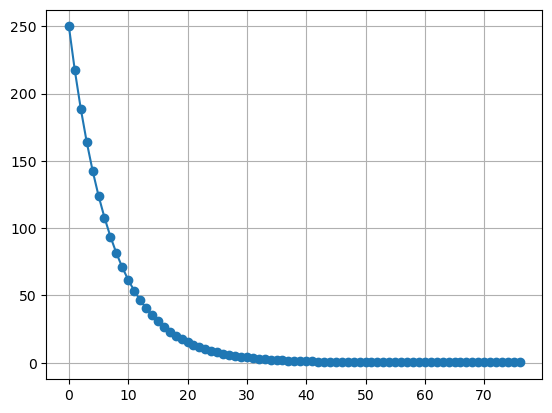

In [61]:
plt.plot(losses,'-o')
plt.grid()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

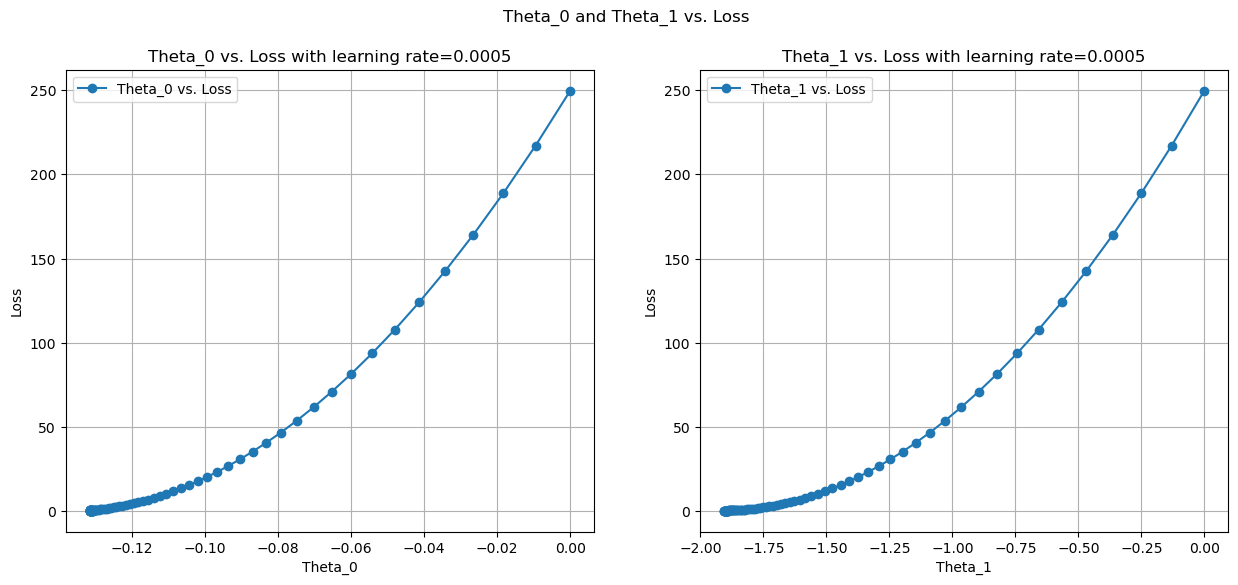

In [62]:
plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(theta_0_all, losses, '-o', label='Theta_0 vs. Loss')
plt.title('Theta_0 vs. Loss with learning rate=0.0005')
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(theta_1_all, losses, '-o', label='Theta_1 vs. Loss')
plt.title('Theta_1 vs. Loss with learning rate=0.0005')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 
plt.show()


#### Plot all regression lines till converge

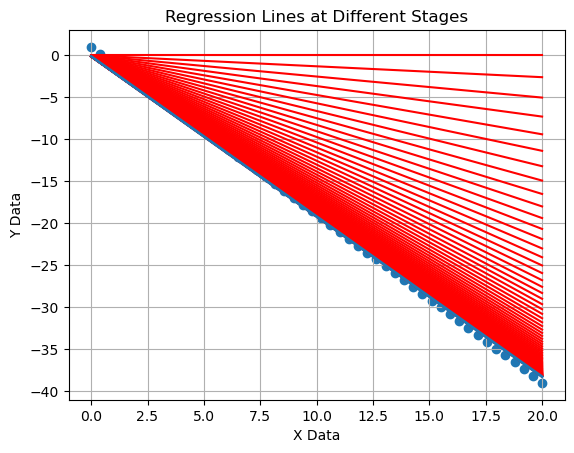

In [63]:
plt.scatter(X, y)

# all regression lines
for i in range(len(theta_0_all)):
    y_pred = theta_0_all[i] + theta_1_all[i] * X
    plt.plot(X, y_pred,color='red')

# final regression line
plt.plot(X, y_pred, linewidth=2)

plt.title('Regression Lines at Different Stages')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.grid(True)


#### Plot the best regression line

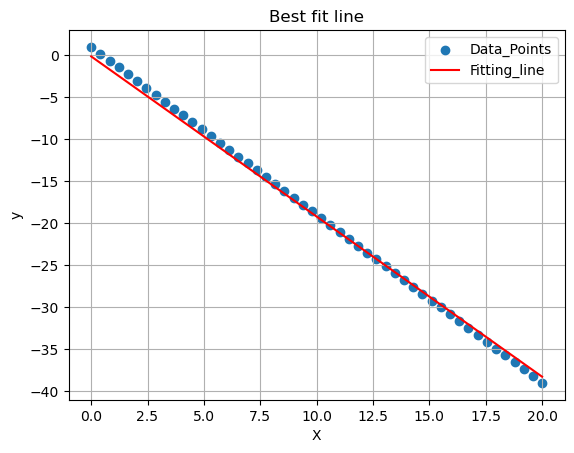

In [64]:
y_pred=final_predictions
# Data points
plt.scatter(X, y, label='Data_Points')

# fitting line
plt.plot(X, y_pred, color='red', label='Fitting_line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best fit line')
plt.legend()
plt.grid()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [71]:
theta_0,theta_1,losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=1000, lr=0.00005)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

J = 249.88775510204087

Gradient Vector:
[[19.0]
 [259.3877551020408]]

Gradient Vector Norm: 260.0826935743251

theta_0_new: -0.00095
theta_1_new: -0.01296938775

In [72]:
r2_score(y,final_predictions)

0.9965793400861428

In [73]:
def visualization_summary():
    plt.figure(figsize=(15, 25))

    # Subplot 1
    plt.subplot(5, 1, 1)
    plt.plot(losses, '-o',color='black')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 2
    plt.subplot(5, 1, 2)
    plt.plot(theta_0_all, losses, '-o',color='black')
    plt.title('Theta_0 vs. Loss with learning rate=0.00005')
    plt.xlabel('Theta_0')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 3
    plt.subplot(5, 1, 3)
    plt.plot(theta_1_all, losses, '-o',color='black')
    plt.title('Theta_1 vs. Loss with learning rate=0.00005')
    plt.xlabel('Theta_1')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 4
    plt.subplot(5, 1, 4)
    plt.scatter(X, y)
    # Plot all regression lines till converge 
    for i in range(len(theta_0_all)):
        y_pred = theta_0_all[i] + theta_1_all[i] * X
        plt.plot(X, y_pred, color='red')

    # final regression line
    plt.plot(X, y_pred, linewidth=2)
    plt.title('Regression Lines at Different Stages')
    plt.grid(True)

    # Subplot 5
    plt.subplot(5, 1, 5)
    y_pred=final_predictions
    # Data points
    plt.scatter(X, y, label='Data_Points')
    # fitting line
    plt.plot(X, y_pred, color='red', label='Fitting_line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Best fit line')
    plt.legend()
    plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


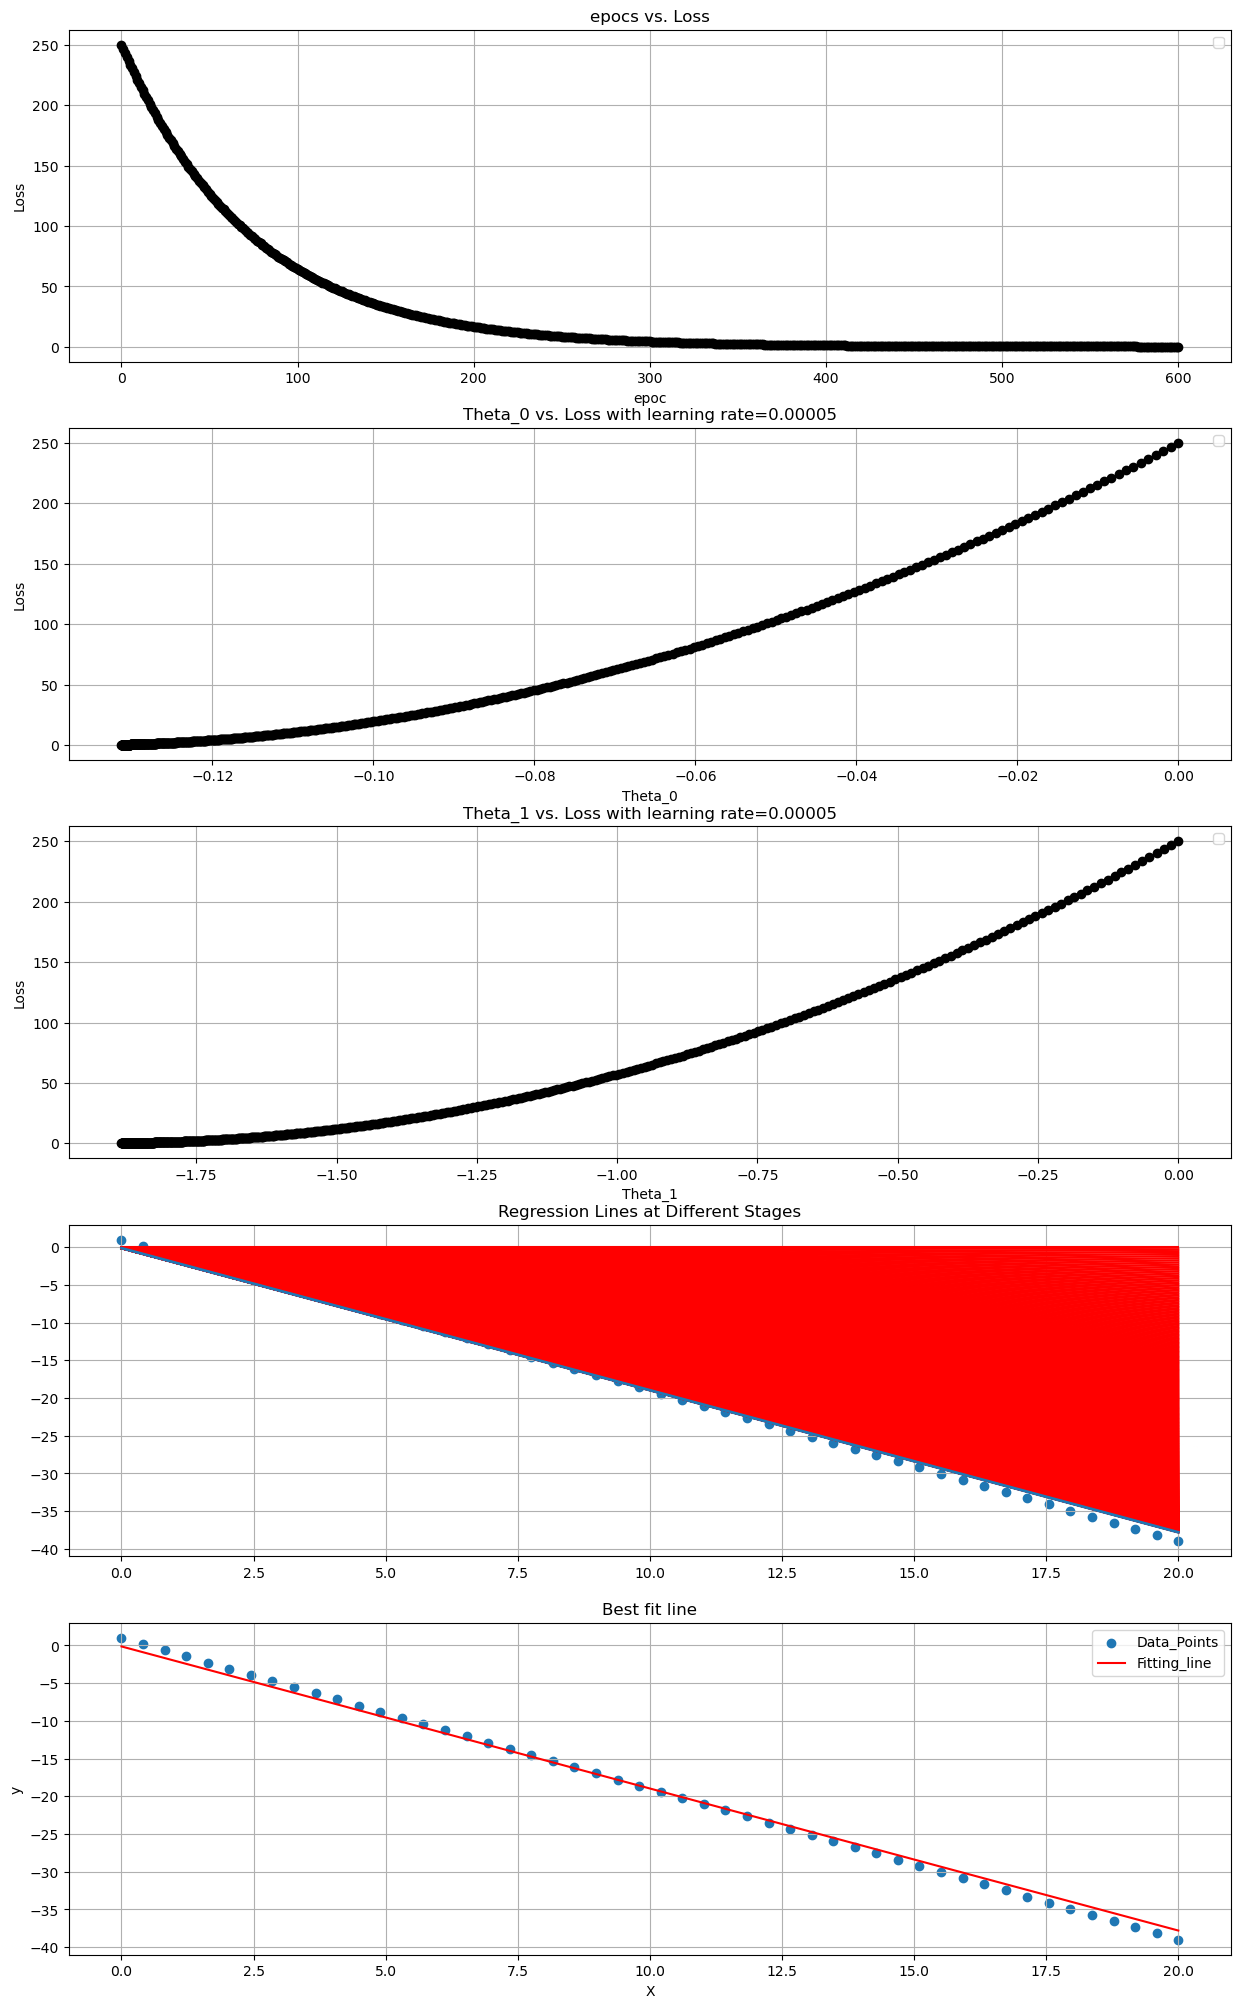

In [74]:
visualization_summary()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [75]:
theta_0,theta_1,losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=300, lr=0.005)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

J = 249.88775510204087

Gradient Vector:
[[19.0]
 [259.3877551020408]]

Gradient Vector Norm: 260.0826935743251

theta_0_new: -0.095
theta_1_new: -1.2969387755102

In [76]:
r2_score(y,final_predictions)

0.9976200723230484

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


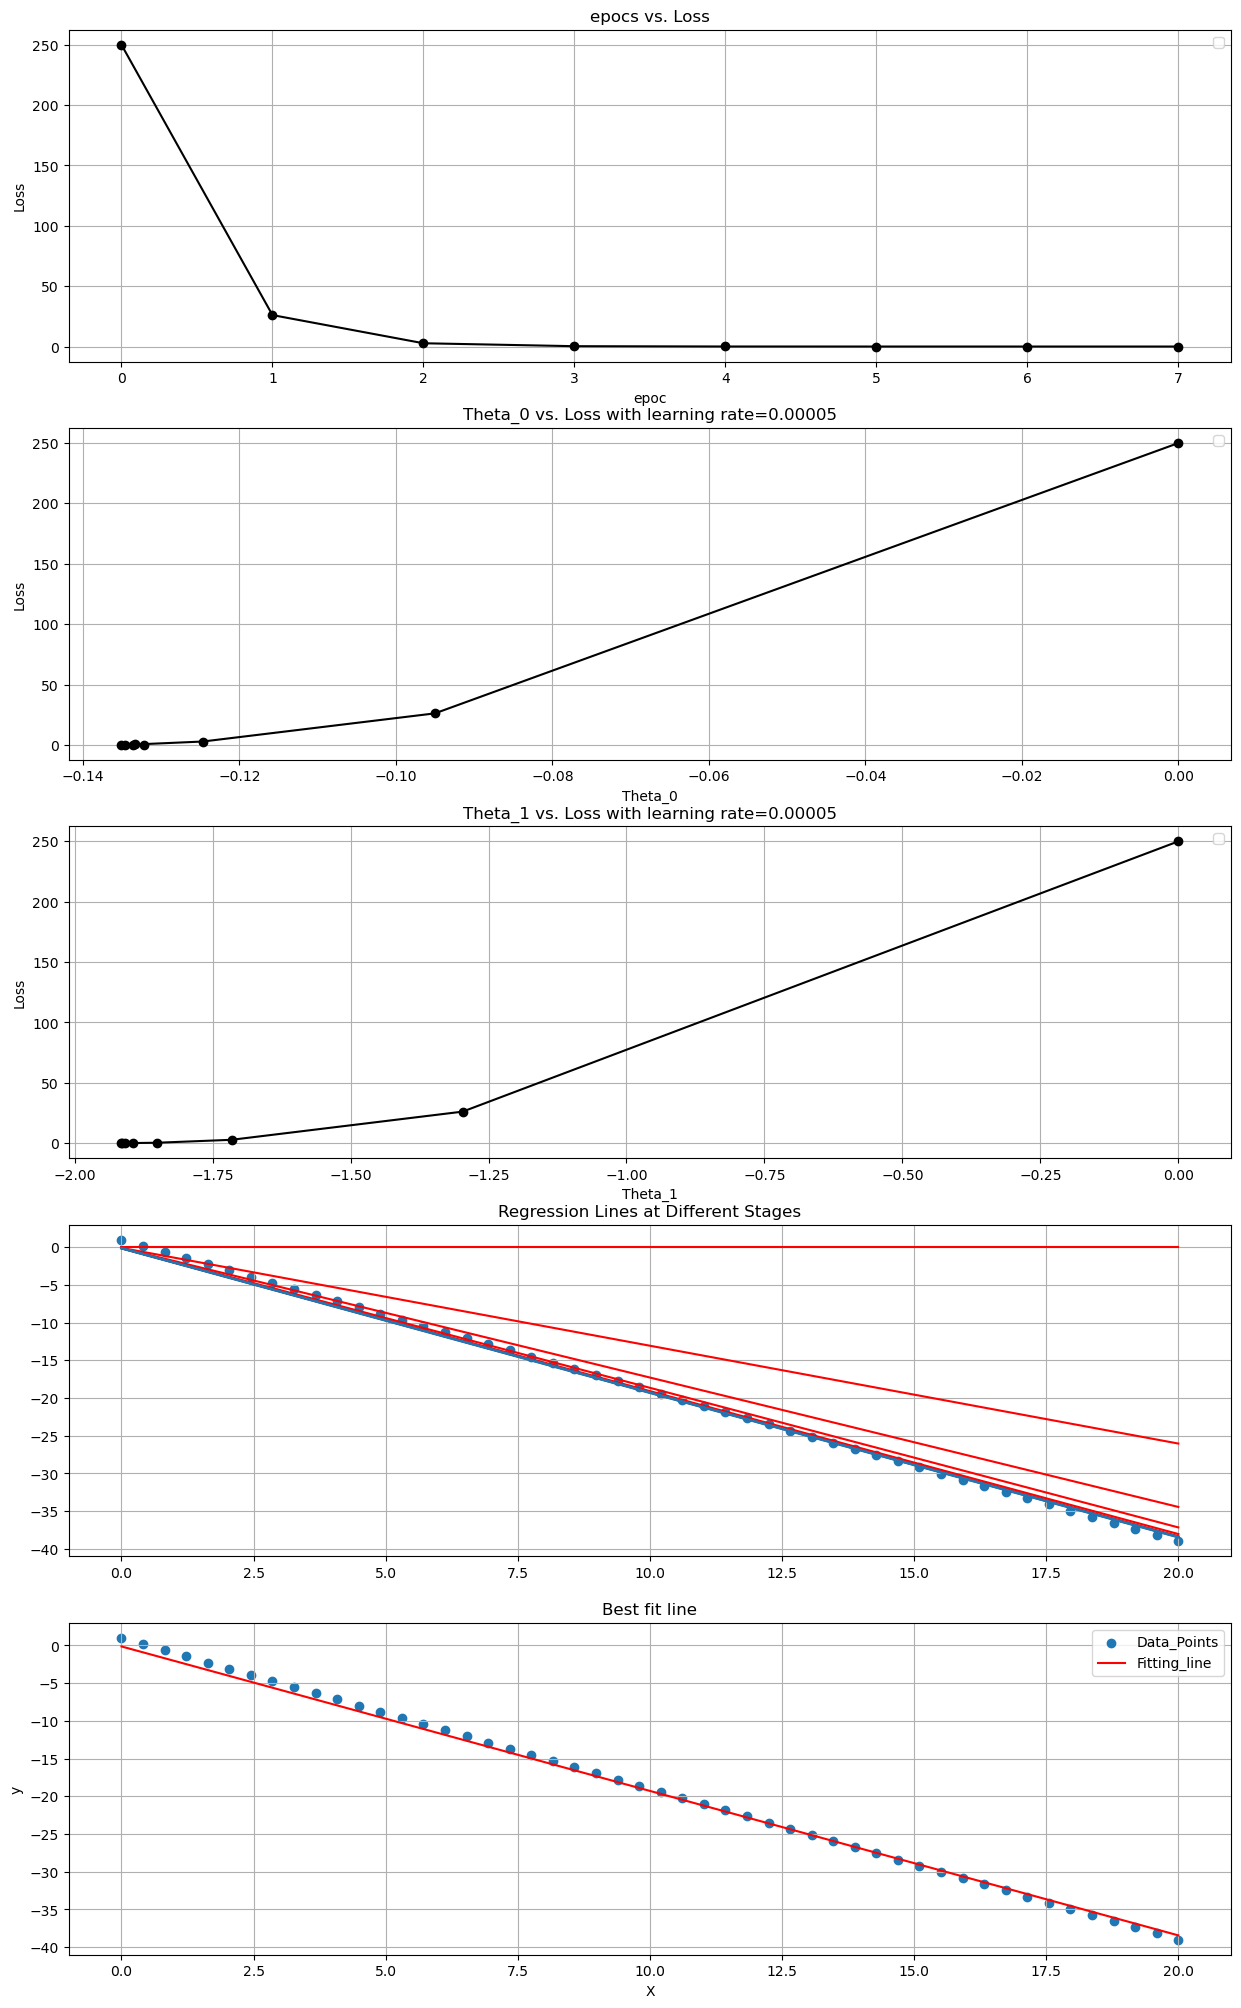

In [77]:
visualization_summary()

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [297]:
from sklearn.utils import shuffle

def St_GD_LR_1var(X, y, lr=0.01,n_iter=1000,convergance_rate=0.001,norm_value_check=0.001):
    np.random.seed(101)
    alldata = np.column_stack((X, y))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    for i in range(n_iter):
        for j in range(m):
            # We need to append theta First due to initialization
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)

            # Step two: Predict using initial theta
            h = theta_0 + theta_1 * X[j]

            # Step three: Calculate J & Error Vector
            error_vector = h - y[j]
            #J = np.sum(error_vector**2) / (2 * m)
            J=(h-y[j])**2/2
            losses.append(J)

            # Step four: Calculate gradient for weights
            theta_0_grad=(h-y[j])
            theta_1_grad=(h-y[j])*X[j]
            
            # Gradient vector norm
            grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
            
            if (grad_vector < norm_value_check):
                return theta_0, theta_1, losses, theta_0_all, theta_1_all
            
            # Step Five: Update our weights
            theta_0 = theta_0 - lr * theta_0_grad
            theta_1 = theta_1 - lr * theta_1_grad


        # Convergence check
        if ((i > 1) and (abs(losses[- 1] - losses[-(m+1)]) < convergance_rate)):
            break

        # information each epoch
        print(f"****************** Epoch {i} ********************")
        print(f"Cost = {J}\n")
        print("Gradient Vector:")
        print(np.array([[theta_0_grad], [theta_1_grad]]))
        print(f"\nGradient Vector Norm: {grad_vector}\n")
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

        
    return theta_0,theta_1,losses, theta_0_all, theta_1_all

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [298]:
theta_0,theta_1,losses, theta_0_all, theta_1_all  = St_GD_LR_1var(X,y,0.0005,300)

****************** Epoch 0 ********************
Cost = 0.25209950460007696

Gradient Vector:
[[0.71006972]
 [8.98455566]]

Gradient Vector Norm: 9.012571185993627

theta_0_new : -0.12761222125212127
theta_1_new : -1.8592841835063174

****************** Epoch 1 ********************
Cost = 0.00017746175474585356

Gradient Vector:
[[0.01883941]
 [0.23837626]]

Gradient Vector Norm: 0.23911955711901475

theta_0_new : -0.12397684636948911
theta_1_new : -1.909800583000258



In [16]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0005,300)

****************** Epoch 0 ********************

Cost = 0.25209950460007696

Gradient Vector:
[[0.71006972]
 [8.98455566]]

Gradient Vector Norm:
9.012571185993627

theta_0_new : -0.1272571863914385
theta_1_new : -1.85479190567727

****************** Epoch 1 ********************

Cost = 0.00017746175474585356

Gradient Vector:
[[0.01883941]
 [0.23837626]]

Gradient Vector Norm:
0.23911955711901475

theta_0_new : -0.12396742666262674
theta_1_new : -1.9096813948726117

****************** Epoch 2 ********************

Cost = 3.587899143823388e-08

Gradient Vector:
[[0.00026788]
 [0.00338946]]

Gradient Vector Norm:
0.0034000305958517907

theta_0_new : -0.116860104687079
theta_1_new : -1.9117108530755937

****************** Training Report ********************

Gradient Descent converged after 3 epochs

theta_0_Opt : -0.116860104687079
theta_1_Opt : -1.9117108530755937

Cost = 3.587899143823388e-08



In [299]:
# predictions
final_predictions = theta_0 + theta_1 * X

In [300]:
r2_score(y,final_predictions)

0.9976568143190673

In [301]:
def visualization_summary_model():
    plt.figure(figsize=(15, 25))

    # Subplot 1
    plt.subplot(4, 1, 1)
    plt.plot(losses, '-o',color='black')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 2
    plt.subplot(4, 1, 2)
    plt.plot(theta_0_all, losses, '-o',color='black')
    plt.title('Theta_0 vs. Loss with learning rate=0.00005')
    plt.xlabel('Theta_0')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 3
    plt.subplot(4, 1, 3)
    plt.plot(theta_1_all, losses, '-o',color='black')
    plt.title('Theta_1 vs. Loss with learning rate=0.00005')
    plt.xlabel('Theta_1')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 4
    plt.subplot(4, 1, 4)
    y_pred=final_predictions
    # Data points
    plt.scatter(X, y, label='Data_Points')
    # fitting line
    plt.plot(X, y_pred, color='red', label='Fitting_line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Best fit line')
    plt.legend()
    plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


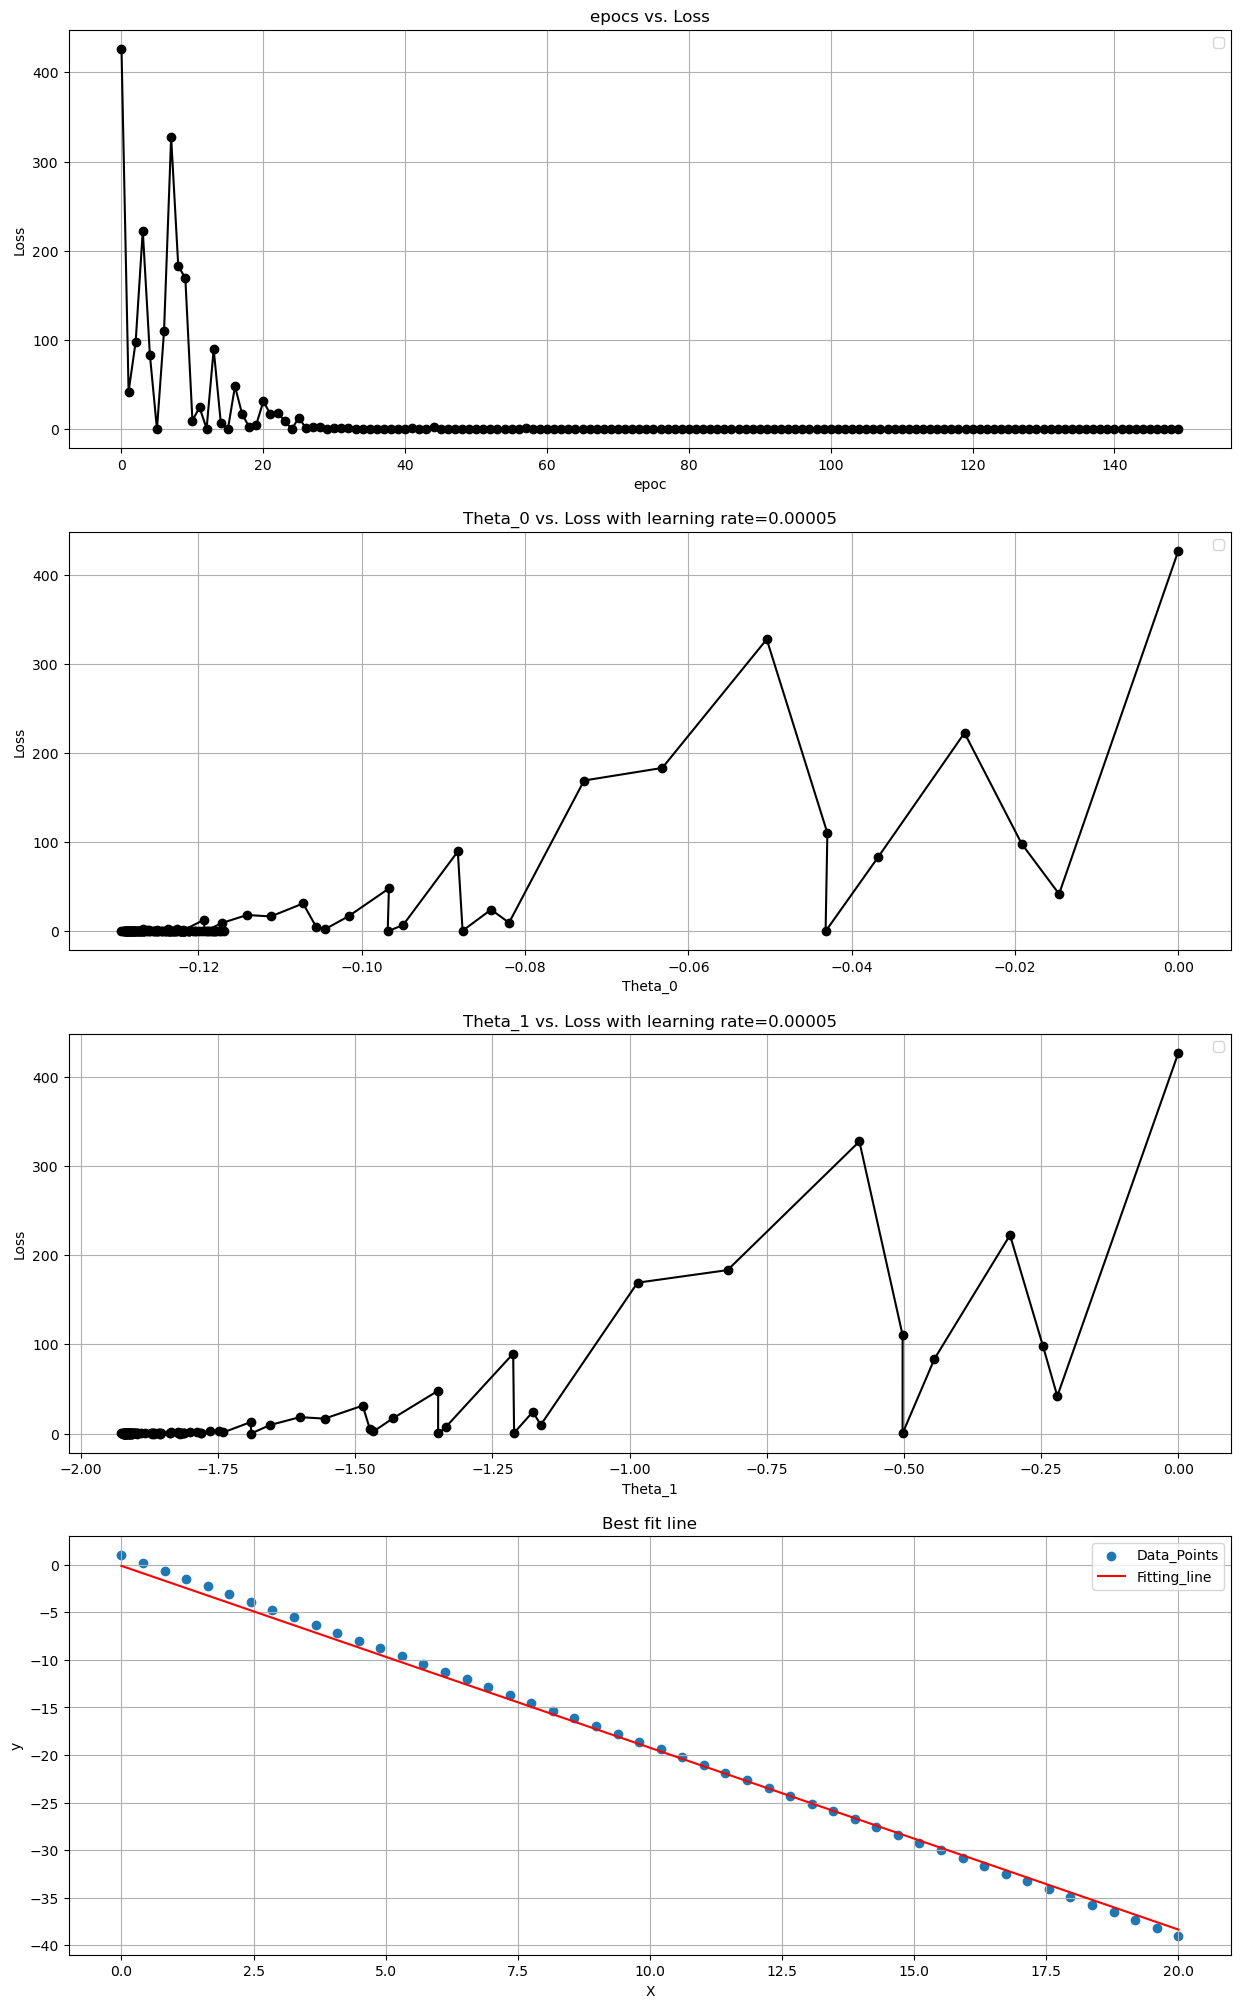

In [302]:
visualization_summary_model()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [303]:
theta_0,theta_1,losses, theta_0_all, theta_1_all  = St_GD_LR_1var(X,y,0.0001,300)

****************** Epoch 0 ********************
Cost = 77.08339441916262

Gradient Vector:
[[ 12.41639194]
 [157.10536742]]

Gradient Vector Norm: 157.59525139074904

theta_0_new : -0.0684094452130673
theta_1_new : -0.9500743631688013

****************** Epoch 1 ********************
Cost = 19.384194190624033

Gradient Vector:
[[ 6.22642661]
 [78.78335716]]

Gradient Vector Norm: 79.02901842704571

theta_0_new : -0.10214664348275128
theta_1_new : -1.428733851630339

****************** Epoch 2 ********************
Cost = 4.830561509456486

Gradient Vector:
[[ 3.10823471]
 [39.3286841 ]]

Gradient Vector Norm: 39.45131830456044

theta_0_new : -0.11841844022588549
theta_1_new : -1.6699154908906342

****************** Epoch 3 ********************
Cost = 1.181899543652157

Gradient Vector:
[[ 1.53746515]
 [19.45364067]]

Gradient Vector Norm: 19.514300769285008

theta_0_new : -0.12589287520313883
theta_1_new : -1.7914663162395936

****************** Epoch 4 ********************
Cost = 0.2784

In [305]:
final_predictions = theta_0 + theta_1 * X
r2_score(y,final_predictions)

0.9976375173449827

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


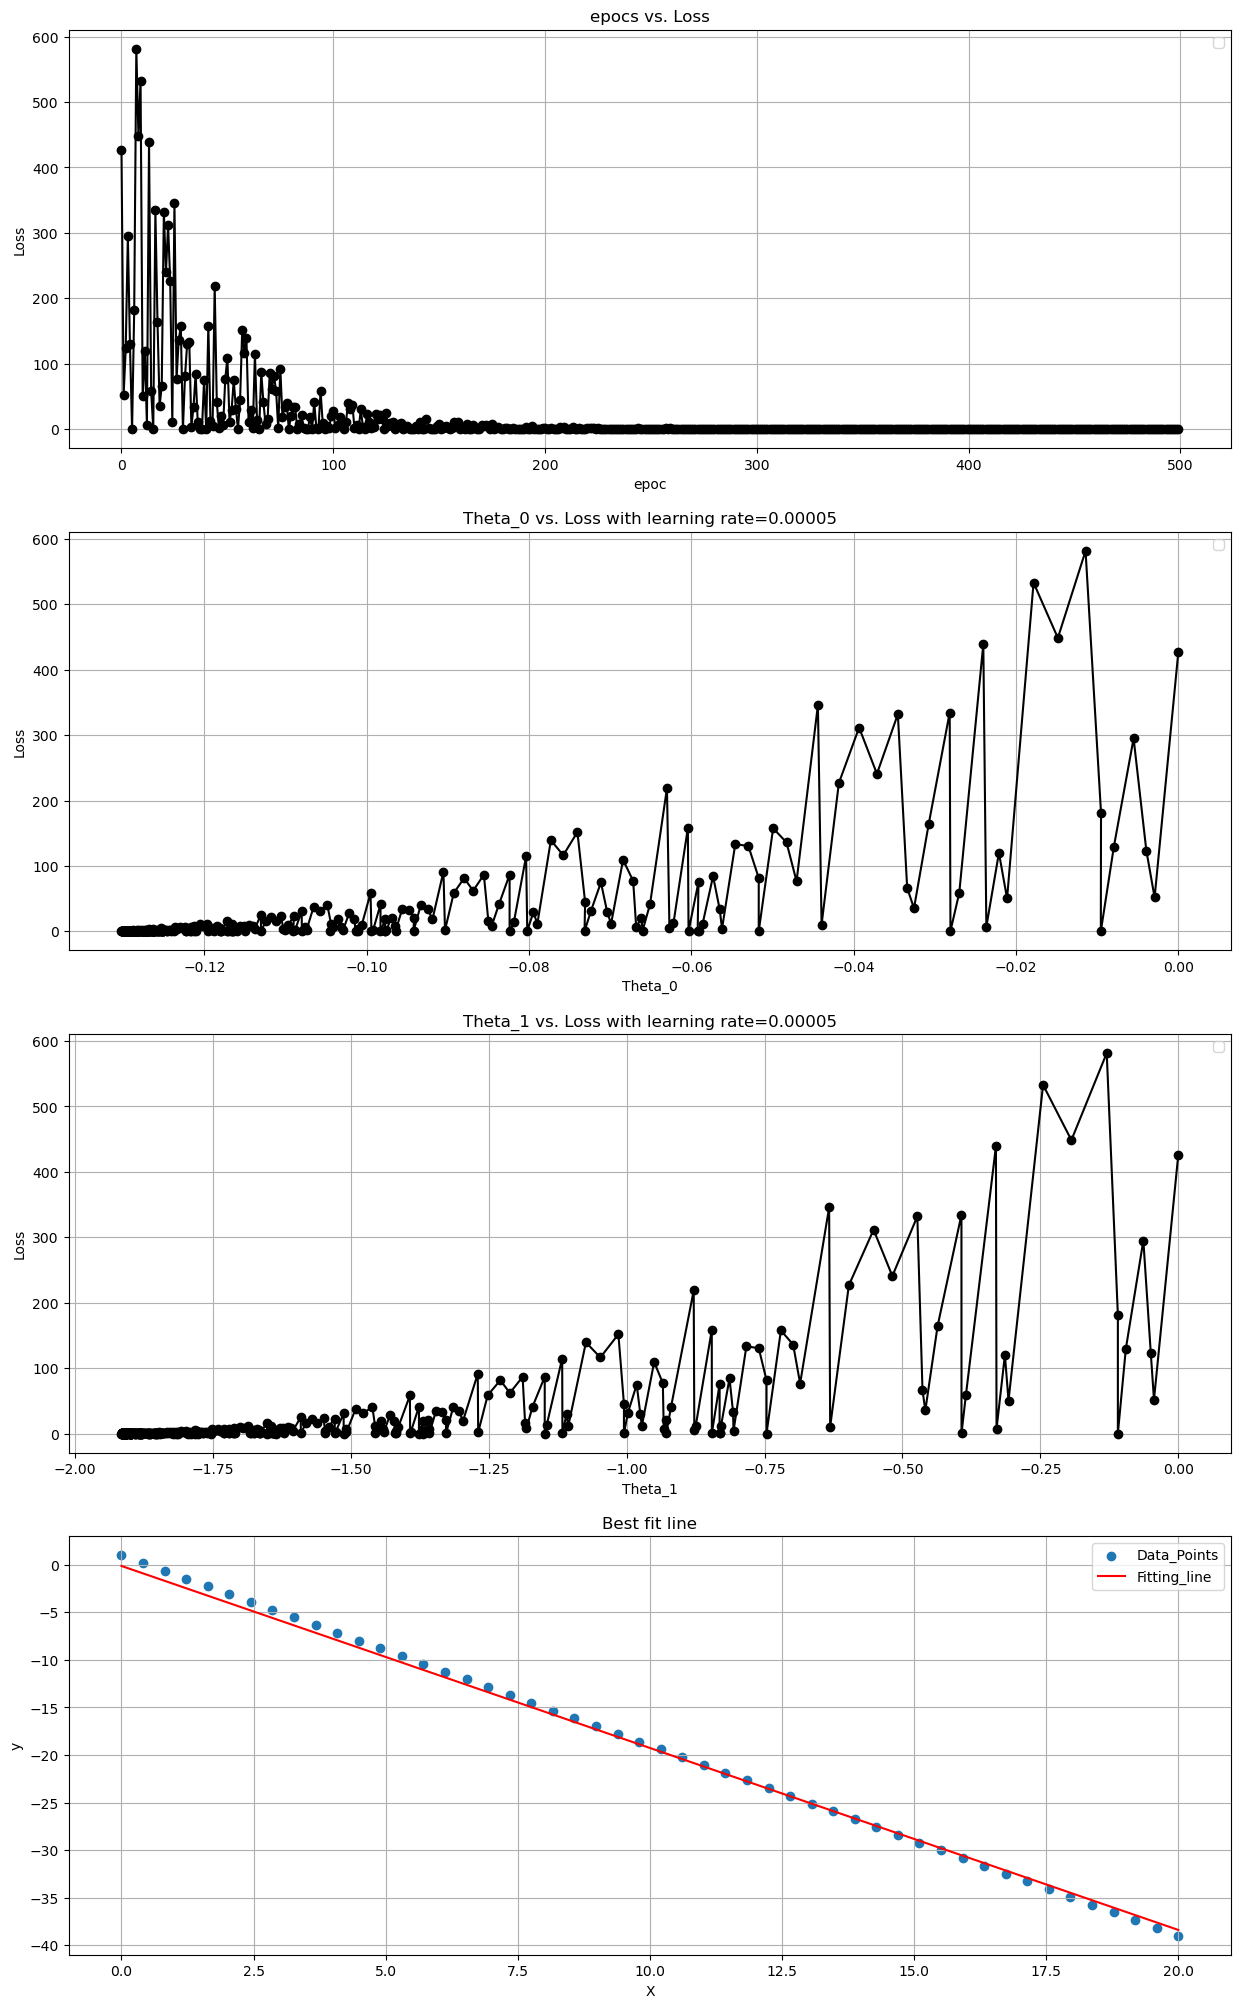

In [306]:
visualization_summary_model()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [307]:
theta_0,theta_1,losses, theta_0_all, theta_1_all  = St_GD_LR_1var(X,y,0.00007,300)

****************** Epoch 0 ********************
Cost = 115.77496572621477

Gradient Vector:
[[ 15.21676482]
 [192.53865685]]

Gradient Vector Norm: 193.13902845642275

theta_0_new : -0.0526625963181957
theta_1_new : -0.7277523032709559

****************** Epoch 1 ********************
Cost = 44.27618208821564

Gradient Vector:
[[  9.41022657]
 [119.06817298]]

Gradient Vector Norm: 119.43944985086782

theta_0_new : -0.08492087485410607
theta_1_new : -1.1789316302972381

****************** Epoch 2 ********************
Cost = 16.881779141921317

Gradient Vector:
[[ 5.81064181]
 [73.52240662]]

Gradient Vector Norm: 73.75166325784151

theta_0_new : -0.10453040045312463
theta_1_new : -1.4586570394661047

****************** Epoch 3 ********************
Cost = 6.40532844123651

Gradient Vector:
[[ 3.5791978 ]
 [45.28780888]]

Gradient Vector Norm: 45.42902475523053

theta_0_new : -0.11629902421809676
theta_1_new : -1.6320942310148396

****************** Epoch 4 ********************
Cost = 2.4

In [308]:
final_predictions = theta_0 + theta_1 * X
r2_score(y,final_predictions)

0.9976193527156806

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


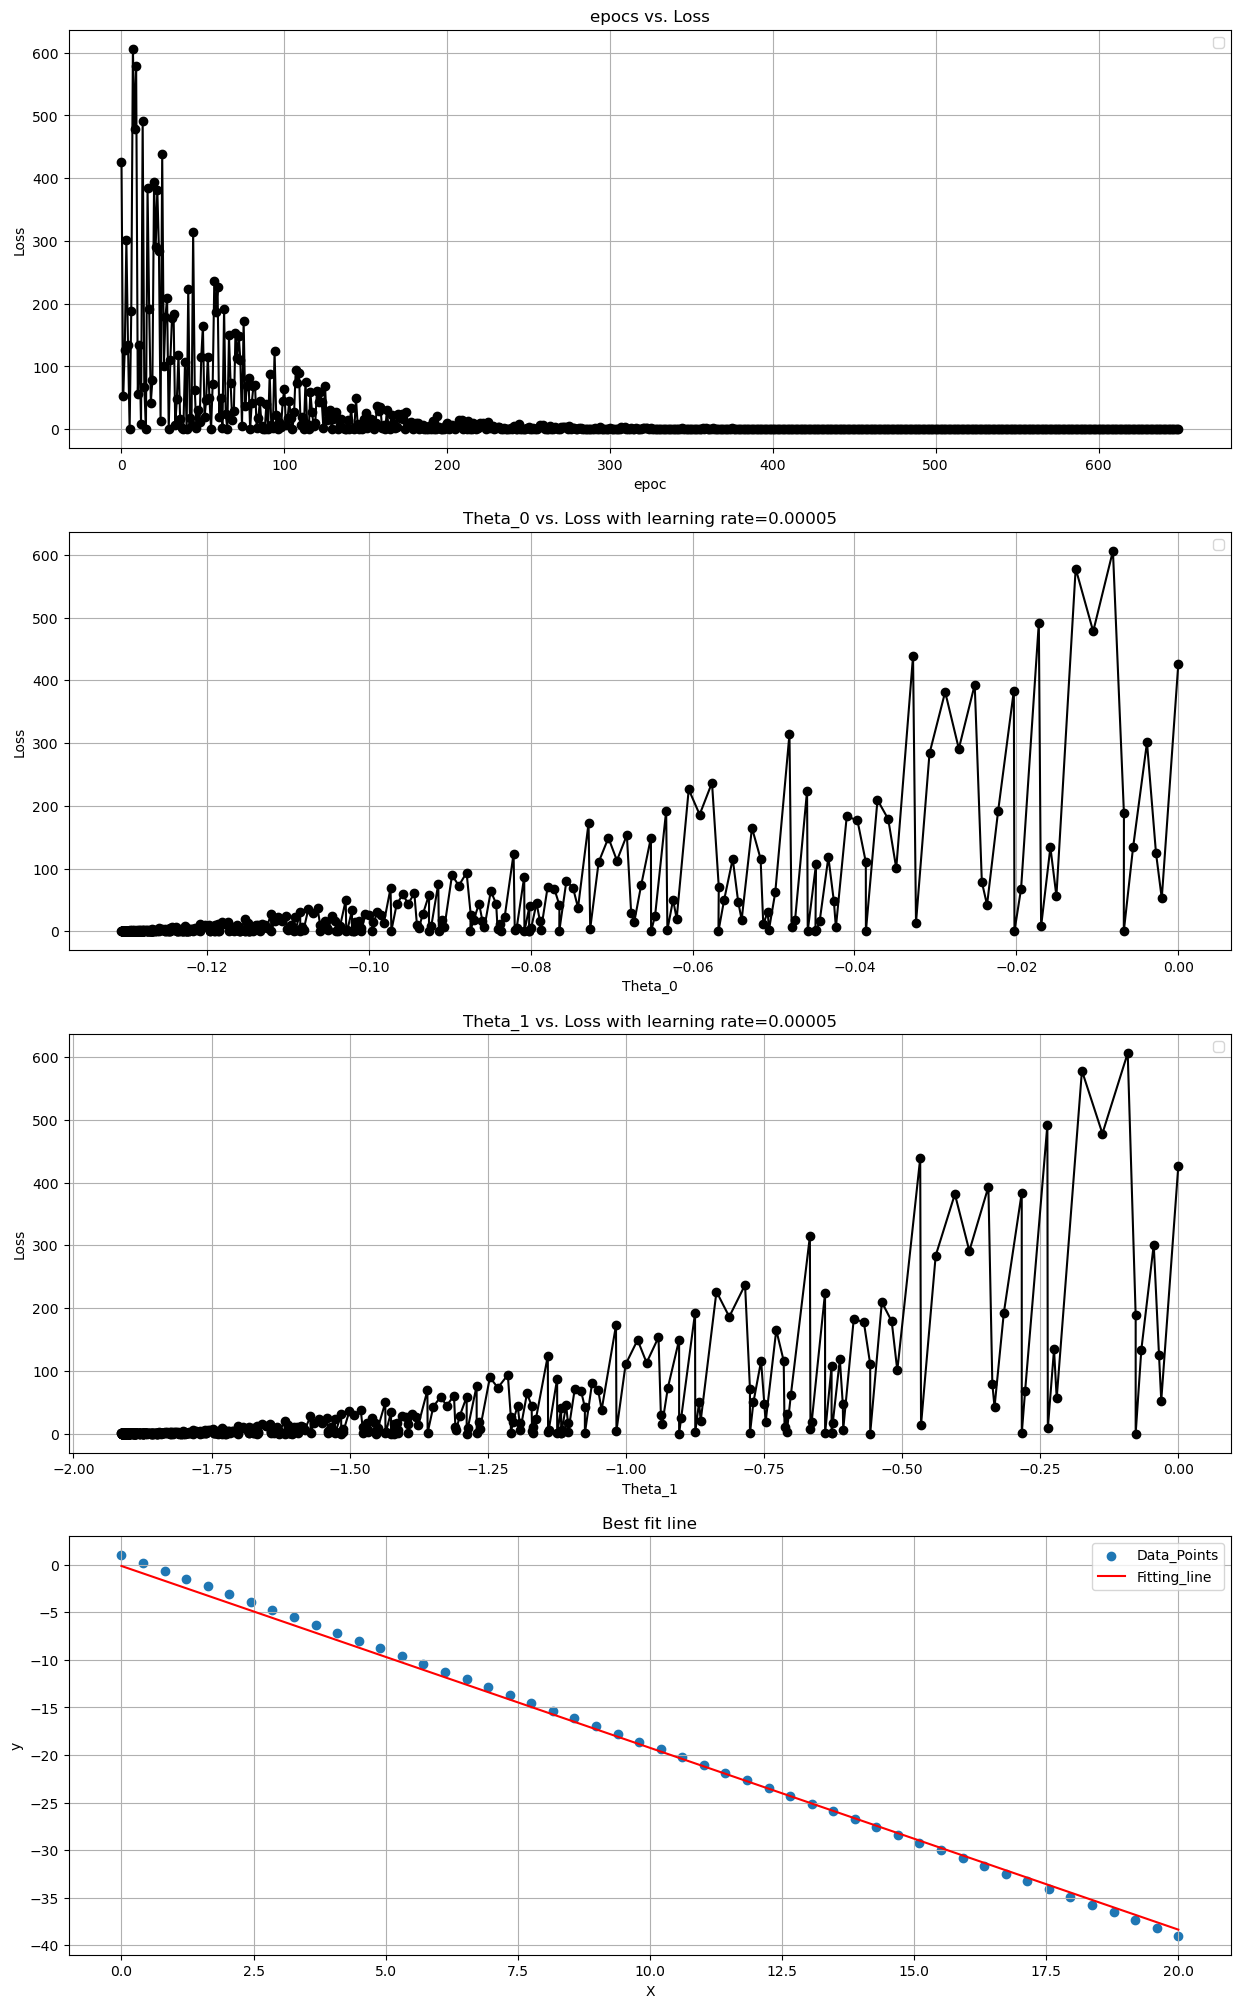

In [309]:
visualization_summary_model()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [203]:
np.random.seed(101)
alldata = np.column_stack((X, y))
alldata = shuffle(alldata)
X2 = alldata[:, :-1]
y2 = alldata[:, -1]

m = len(X)
theta_0 = 0
theta_1 = 0
losses = []
theta_0_all = []
theta_1_all = []


In [210]:
X2.flatten()

array([15.10204082,  5.71428571,  8.57142857, 13.06122449,  8.97959184,
        0.40816327, 10.6122449 , 18.7755102 , 17.14285714, 19.18367347,
        6.53061224,  9.79591837,  2.85714286, 18.36734694,  7.34693878,
        1.2244898 , 16.73469388, 12.24489796,  6.12244898,  8.16326531,
       17.55102041, 15.51020408, 17.95918367, 15.91836735,  4.08163265,
       20.        , 10.20408163, 13.46938776, 14.69387755,  0.81632653,
       11.02040816, 13.87755102, 14.28571429,  3.26530612,  7.75510204,
       11.83673469,  4.89795918,  2.04081633,  0.        , 11.42857143,
        1.63265306, 16.32653061,  5.30612245,  3.67346939, 19.59183673,
        9.3877551 ,  2.44897959,  6.93877551,  4.48979592, 12.65306122])

In [207]:
y2

array([-29.20408163, -10.42857143, -16.14285714, -25.12244898,
       -16.95918367,   0.18367347, -20.2244898 , -36.55102041,
       -33.28571429, -37.36734694, -12.06122449, -18.59183673,
        -4.71428571, -35.73469388, -13.69387755,  -1.44897959,
       -32.46938776, -23.48979592, -11.24489796, -15.32653061,
       -34.10204082, -30.02040816, -34.91836735, -30.83673469,
        -7.16326531, -39.        , -19.40816327, -25.93877551,
       -28.3877551 ,  -0.63265306, -21.04081633, -26.75510204,
       -27.57142857,  -5.53061224, -14.51020408, -22.67346939,
        -8.79591837,  -3.08163265,   1.        , -21.85714286,
        -2.26530612, -31.65306122,  -9.6122449 ,  -6.34693878,
       -38.18367347, -17.7755102 ,  -3.89795918, -12.87755102,
        -7.97959184, -24.30612245])

In [279]:
def mini_batch(X, y, lr=0.001, n_iter=1000, batch_size=32, convergance_rate=0.1, norm_value_check=0.1):
    np.random.seed(101)
    alldata = np.column_stack((X, y))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]
    
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    # Calculate the number of batches
    number_of_batches = m // batch_size
    
    for epoch in range(n_iter):
        for j in range(number_of_batches):
            start = j * batch_size
            end = start + batch_size

            # We need to append theta First due to initialization
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)

            # Step two: Predict using initial theta
            h = theta_0 + theta_1 * X[start:end]

            # Step three: Calculate J & Error Vector
            error_vector = h - y[start:end]
            J = np.sum(error_vector**2) / (2 * batch_size)
            losses.append(J)

            # Step four: Calculate gradient for weights
            theta_0_grad = np.sum(error_vector) / batch_size
            theta_1_grad = np.sum(error_vector * X[start:end]) / batch_size

            # Gradient vector norm
            grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
            # Convergence check
            if (grad_vector < norm_value_check):
                return theta_0, theta_1, losses, theta_0_all, theta_1_all
            
            # Step Five: Update our weights
            theta_0 = theta_0 - lr * theta_0_grad
            theta_1 = theta_1 - lr * theta_1_grad
            

        if ((epoch > 1) and (abs(losses[-1] - losses[-int(np.ceil(m / batch_size+1))]) < convergance_rate)):
            break

        # Information for each epoch
        print(f"****************** Epoch {epoch} ********************")
        print(f"Cost = {J}\n")
        print("Gradient Vector:")
        print(np.array([[theta_0_grad], [theta_1_grad]]))
        print(f"\nGradient Vector Norm: {np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))}\n")
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

    return theta_0, theta_1, losses, theta_0_all, theta_1_all

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [271]:
theta_0, theta_1, losses, theta_0_all, theta_1_all =mini_batch(X,y,0.0005,300,5)

****************** Epoch 0 ********************
Cost = 28.749693808097824

Gradient Vector:
[[ 6.55556162]
 [60.7816351 ]]

Gradient Vector Norm: 61.13413574891091

theta_0_new : -0.06978924724113063
theta_1_new : -0.9693635987180408

****************** Epoch 1 ********************
Cost = 6.467967792096372

Gradient Vector:
[[ 2.96619847]
 [28.61439115]]

Gradient Vector Norm: 28.767719999075442

theta_0_new : -0.103504017832776
theta_1_new : -1.44799256525687

****************** Epoch 2 ********************
Cost = 1.3823105180838944

Gradient Vector:
[[ 1.19448224]
 [12.73525899]]

Gradient Vector Norm: 12.791153559071402

theta_0_new : -0.11940982177970424
theta_1_new : -1.6843464761632723

****************** Epoch 3 ********************
Cost = 0.312788377888108

Gradient Vector:
[[0.32013523]
 [4.89754198]]

Gradient Vector Norm: 4.9079938882509655

theta_0_new : -0.12652431396007574
theta_1_new : -1.8010894682190426

****************** Epoch 4 ********************
Cost = 0.13576522

In [272]:
final_predictions = theta_0 + theta_1 * X
r2_score(y,y_pred)

0.9976568143190673

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


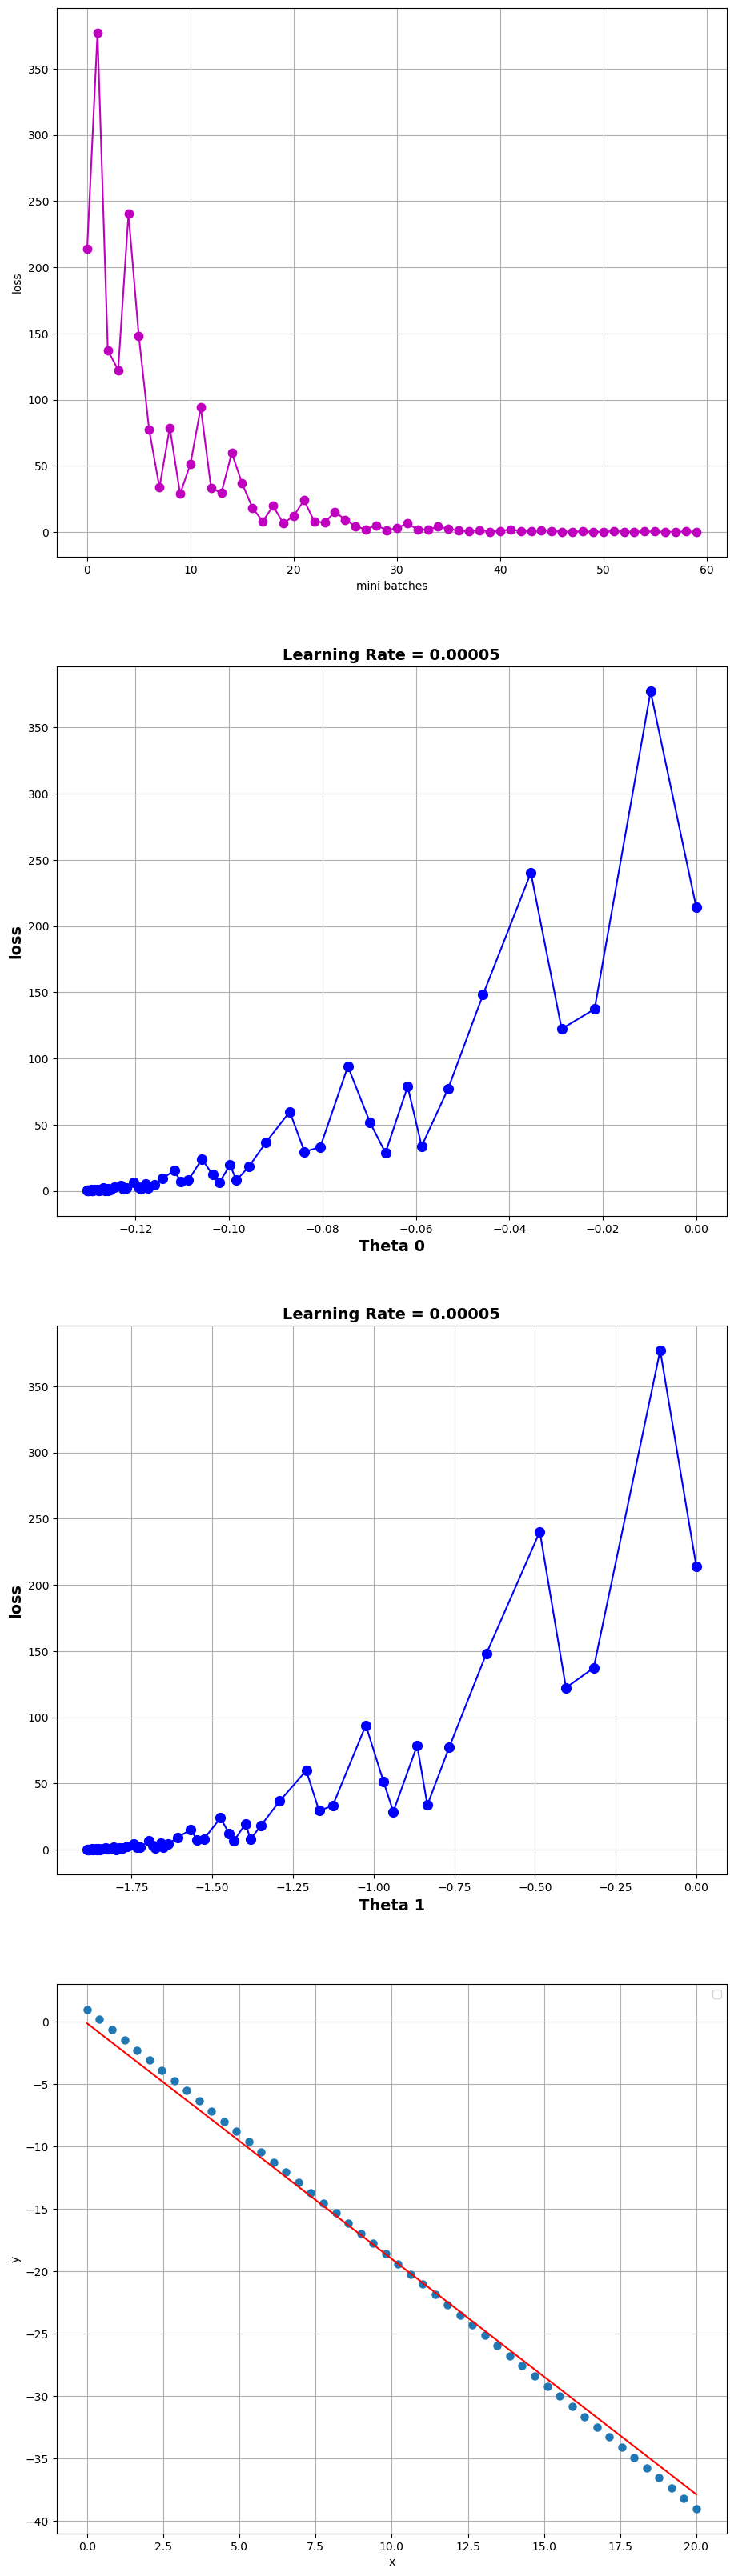

In [259]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
# all_losses=np.array(all_losses)
plt.plot(losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("mini batches")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(theta_0_all,losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(theta_1_all,losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,final_predictions,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [260]:
theta_0, theta_1, losses, theta_0_all, theta_1_all =mini_batch(X,y,0.0005,300,10)

****************** Epoch 0 ********************
Cost = 102.73346702490926

Gradient Vector:
[[ 11.3640554]
 [144.4464855]]

Gradient Vector Norm: 144.89281876537092

theta_0_new : -0.04124848216567694
theta_1_new : -0.5683087110235961

****************** Epoch 1 ********************
Cost = 50.67396313911797

Gradient Vector:
[[  7.86063891]
 [101.34687856]]

Gradient Vector Norm: 101.65126382467815

theta_0_new : -0.07003863931709524
theta_1_new : -0.9679738990170041

****************** Epoch 2 ********************
Cost = 25.000619176542024

Gradient Vector:
[[ 5.39703213]
 [71.03829803]]

Gradient Vector Norm: 71.24301890211146

theta_0_new : -0.0900679276338996
theta_1_new : -1.2490447040747128

****************** Epoch 3 ********************
Cost = 12.354639621109396

Gradient Vector:
[[ 3.66464568]
 [49.72468931]]

Gradient Vector Norm: 49.859546276997584

theta_0_new : -0.10393649132998092
theta_1_new : -1.4467169419665995

****************** Epoch 4 ********************
Cost = 6.

In [261]:
print(r2_score(y,y_hat))

0.9976477342443775


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


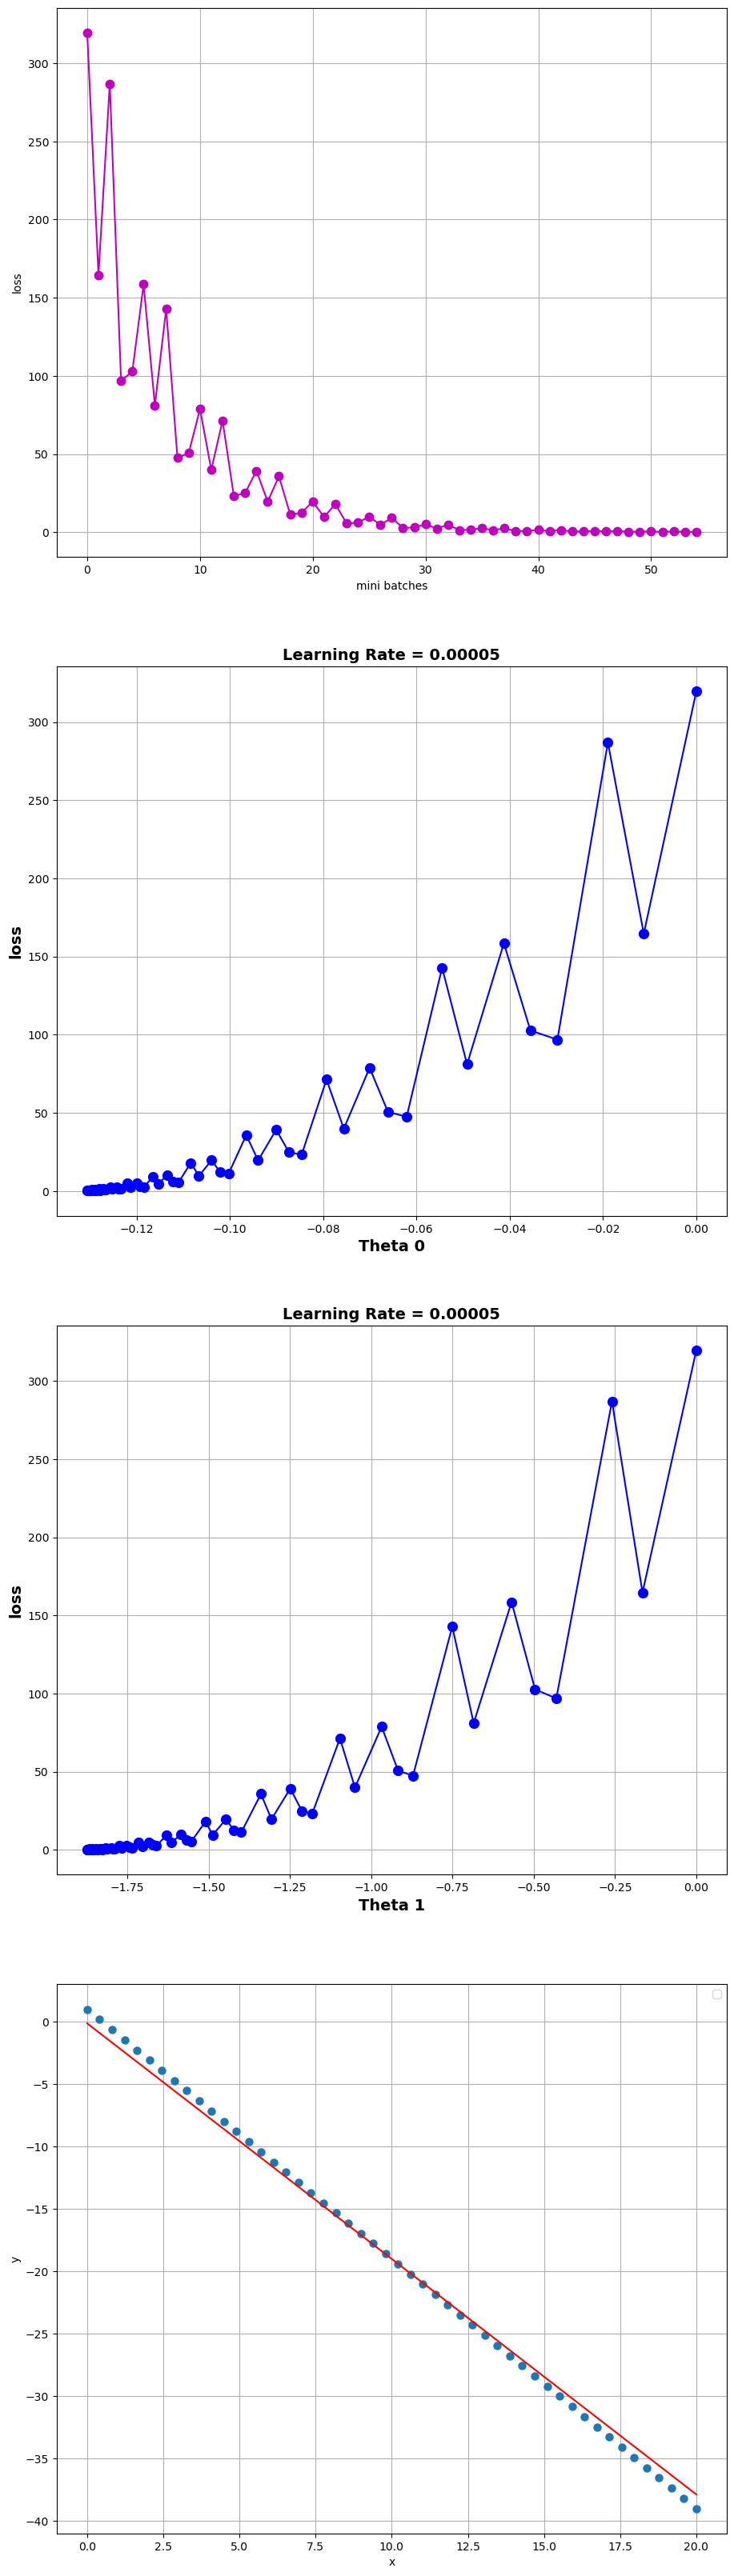

In [262]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
# all_losses=np.array(all_losses)
plt.plot(losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("mini batches")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(theta_0_all,losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(theta_1_all,losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,final_predictions,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [280]:
theta_0, theta_1, losses, theta_0_all, theta_1_all =mini_batch(X,y,0.0005,300,20)

****************** Epoch 0 ********************
Cost = 235.77864693894134

Gradient Vector:
[[ 18.63876456]
 [262.81741841]]

Gradient Vector Norm: 263.4775113028915

theta_0_new : -0.0191663210545776
theta_1_new : -0.265552191086041

****************** Epoch 1 ********************
Cost = 175.05848381222808

Gradient Vector:
[[ 16.02039352]
 [226.43750398]]

Gradient Vector Norm: 227.00351587065722

theta_0_new : -0.03564004729885116
theta_1_new : -0.49431730775111304

****************** Epoch 2 ********************
Cost = 129.99125751611945

Gradient Vector:
[[ 13.76478211]
 [195.09768285]]

Gradient Vector Norm: 195.58265536632788

theta_0_new : -0.04979422164868541
theta_1_new : -0.6913918582270111

****************** Epoch 3 ********************
Cost = 96.54110252863586

Gradient Vector:
[[ 11.82167335]
 [168.09969671]]

Gradient Vector Norm: 168.5148657992455

theta_0_new : -0.06195020537256278
theta_1_new : -0.8611662766735059

****************** Epoch 4 ********************
Cost

In [264]:
print(r2_score(y,y_hat))

0.9976477342443775


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


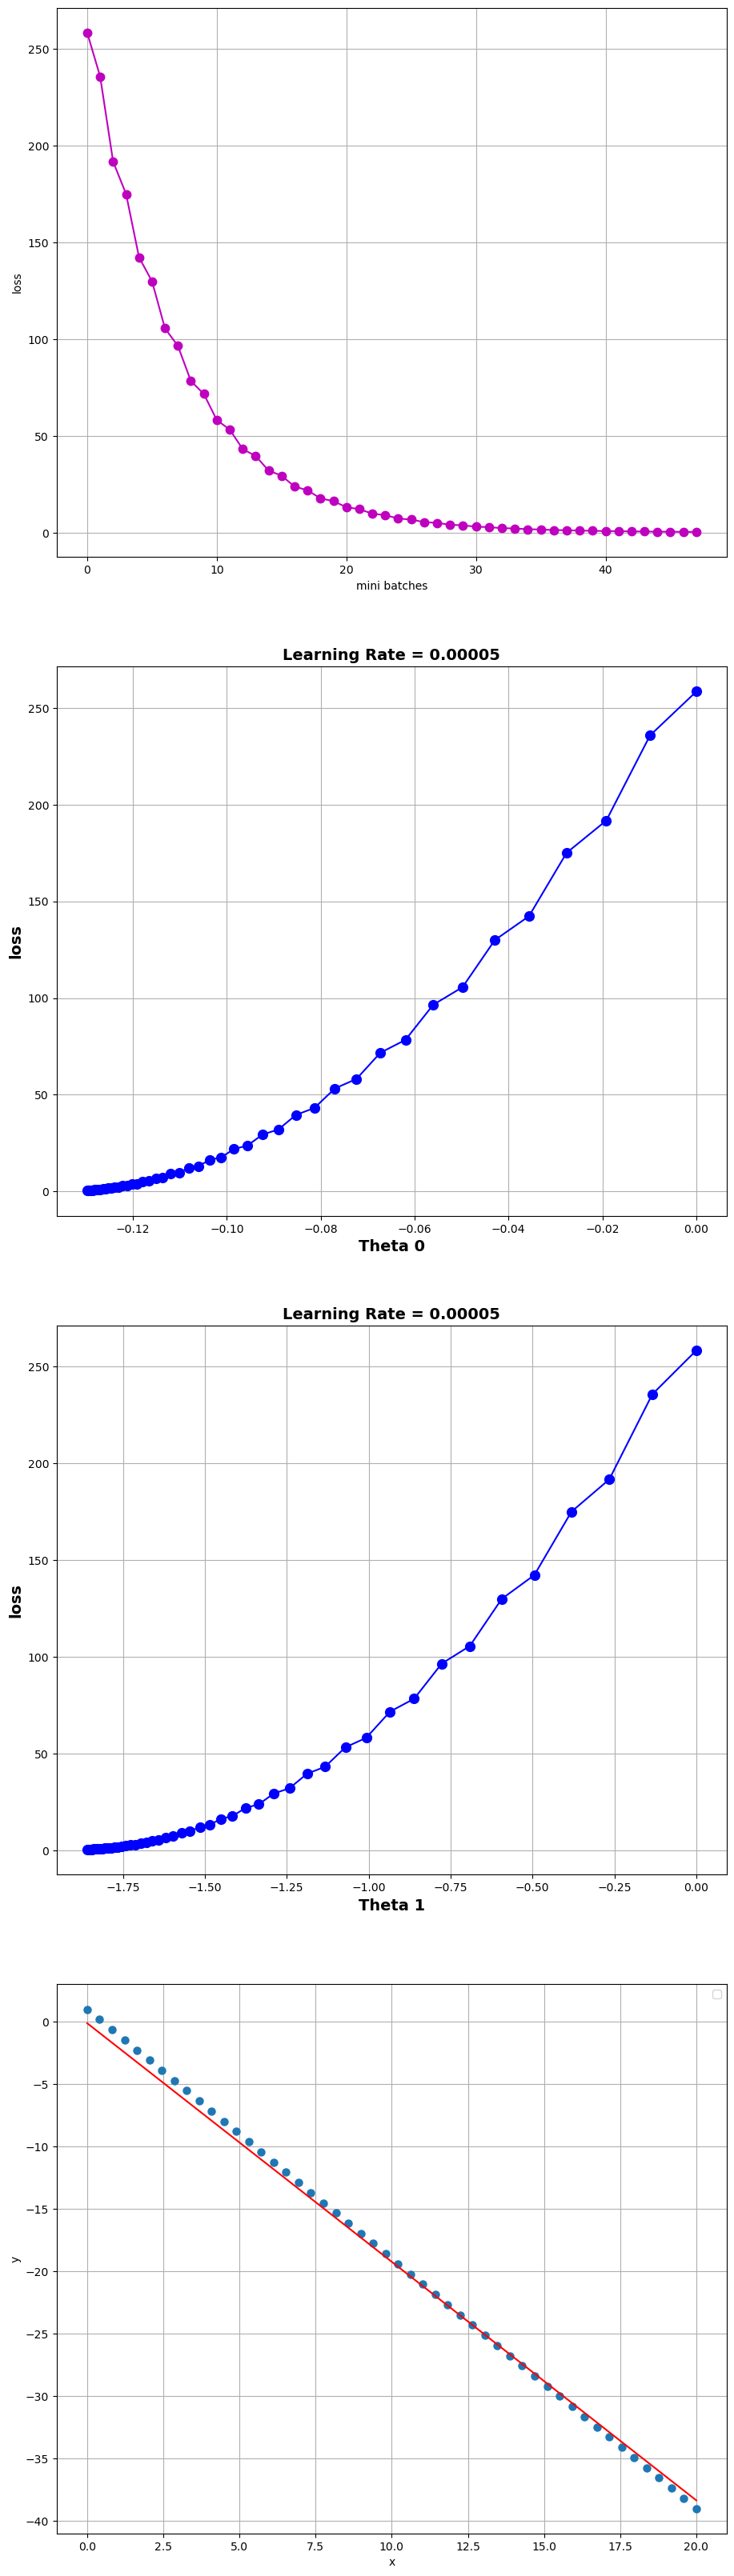

In [281]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
# all_losses=np.array(all_losses)
plt.plot(losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("mini batches")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(theta_0_all,losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(theta_1_all,losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,final_predictions,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()